<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 5:  Web Scraping
### Finding Underpriced RVs on Craigslist

![](https://snag.gy/WrdUMx.jpg)

In this project we will be practicing our web scraping skills.  You can use Scrapy or Python requests in order to complete this project.  It may be helpful to write some prototype code in this notebook to test your assumptions, then move it into a Python file that can be run from the command line.

> In order to run code from the command line, instead of the notebook, you just need to save your code to a file (with a .py extension), and run it using the Python interpreter:<br><br>
> `python my_file.py`

You will be building a process to scrape a single category of search results on Craigslist, that can easily be applied to other categories by changing the search terms.  The main goal is to be able to target and scrape a single page given a set of parameters.

**If you use Scrapy, provide your code in a folder.**

## Import your libraries for scrapy / requests / pandas / numpy / etc
Setup whichever libraries you need. Review past material for reference.

In [3]:
# PREPARE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import scrapy

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1.  Scrape for the largest US cities (non-exhaustive list)
Search, research, and scrape Wikipedia for a list of the largest US cities.  There are a few sources but find one that is in a nice table.  We don't want all cities, just signifficant cities.  Examine your source.  Look for what can be differentiable.

- Use requests
- Build XPath query(ies)
- Extract to a list
- Clean your list

In [216]:
# SCRAPE WIKIPEDIA FOR LARGEST US CITIES (NON-EXHAUSTIVE LIST)
import requests

response = requests.get("https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population")
html = response.text

In [217]:
html

u'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of United States cities by population - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_United_States_cities_by_population","wgTitle":"List of United States cities by population","wgCurRevisionId":769806742,"wgRevisionId":769806742,"wgArticleId":1649321,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia indefinitely semi-protected pages","Use mdy dates from August 2014","Lists of coordinates","Geographic coordinate lists","Articles with Geo","Featured lists","Cities in the United States","Lists of cities in the United S

In [262]:
#cities = Selector(text=html).xpath('//table[@class="wikitable sortable"][1]/tr/td[2]/a/text()').extract()
cities = Selector(text=html).xpath('//table[@class="wikitable sortable"][1]/tr/td[2]//text()').extract()

In [263]:
cities

[u'New York',
 u'[6]',
 u'Los Angeles',
 u'Chicago',
 u'Houston',
 u'[7]',
 u'Philadelphia',
 u'[8]',
 u'Phoenix',
 u'San Antonio',
 u'San Diego',
 u'Dallas',
 u'San Jose',
 u'Austin',
 u'Jacksonville',
 u'[9]',
 u'San Francisco',
 u'[10]',
 u'Indianapolis',
 u'[11]',
 u'Columbus',
 u'Fort Worth',
 u'Charlotte',
 u'Seattle',
 u'Denver',
 u'[12]',
 u'El Paso',
 u'Detroit',
 u'Washington',
 u'[13]',
 u'Boston',
 u'Memphis',
 u'Nashville',
 u'[14]',
 u'Portland',
 u'Oklahoma City',
 u'Las Vegas',
 u'Baltimore',
 u'[15]',
 u'Louisville',
 u'[16]',
 u'Milwaukee',
 u'Albuquerque',
 u'Tucson',
 u'Fresno',
 u'Sacramento',
 u'Kansas City',
 u'Long Beach',
 u'Mesa',
 u'Atlanta',
 u'Colorado Springs',
 u'Virginia Beach',
 u'[15]',
 u'Raleigh',
 u'Omaha',
 u'Miami',
 u'Oakland',
 u'Minneapolis',
 u'Tulsa',
 u'Wichita',
 u'New Orleans',
 u'[17]',
 u'Arlington',
 u'Cleveland',
 u'Bakersfield',
 u'Tampa',
 u'Aurora',
 u'Honolulu',
 u'[2]',
 u'Anaheim',
 u'Santa Ana',
 u'Corpus Christi',
 u'Riverside'

In [264]:
for idx, city in enumerate(cities):
    if city[0] == '[':
        cities.pop(idx)

In [265]:
cities

[u'New York',
 u'Los Angeles',
 u'Chicago',
 u'Houston',
 u'Philadelphia',
 u'Phoenix',
 u'San Antonio',
 u'San Diego',
 u'Dallas',
 u'San Jose',
 u'Austin',
 u'Jacksonville',
 u'San Francisco',
 u'Indianapolis',
 u'Columbus',
 u'Fort Worth',
 u'Charlotte',
 u'Seattle',
 u'Denver',
 u'El Paso',
 u'Detroit',
 u'Washington',
 u'Boston',
 u'Memphis',
 u'Nashville',
 u'Portland',
 u'Oklahoma City',
 u'Las Vegas',
 u'Baltimore',
 u'Louisville',
 u'Milwaukee',
 u'Albuquerque',
 u'Tucson',
 u'Fresno',
 u'Sacramento',
 u'Kansas City',
 u'Long Beach',
 u'Mesa',
 u'Atlanta',
 u'Colorado Springs',
 u'Virginia Beach',
 u'Raleigh',
 u'Omaha',
 u'Miami',
 u'Oakland',
 u'Minneapolis',
 u'Tulsa',
 u'Wichita',
 u'New Orleans',
 u'Arlington',
 u'Cleveland',
 u'Bakersfield',
 u'Tampa',
 u'Aurora',
 u'Honolulu',
 u'Anaheim',
 u'Santa Ana',
 u'Corpus Christi',
 u'Riverside',
 u'St. Louis',
 u'Lexington',
 u'Stockton',
 u'Pittsburgh',
 u'Saint Paul',
 u'Anchorage',
 u'Cincinnati',
 u'Henderson',
 u'Greensbo

In [266]:
print len(cities)

304


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1.2 Only retain cities with properly formed ASCII

Optionally, filter out any cities with impropper ASCII characters.  A smaller list will be easier to look at.  However you may not need to filter these if you spend more time scraping a more concise city list.  This list should help you narrow down the list of regional Craigslist sites.

In [267]:
# ONLY RETAIN PROPERLY FORMED CITIES WITH FILTERING FUNCTION
import string

In [268]:
letters = string.ascii_letters
letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [269]:
for idx, city in enumerate(cities):
    for c in city:
        if not ((c in letters) | (c == ' ') | (c == '.')):
            cities.pop(idx)

In [270]:
cities

[u'New York',
 u'Los Angeles',
 u'Chicago',
 u'Houston',
 u'Philadelphia',
 u'Phoenix',
 u'San Antonio',
 u'San Diego',
 u'Dallas',
 u'San Jose',
 u'Austin',
 u'Jacksonville',
 u'San Francisco',
 u'Indianapolis',
 u'Columbus',
 u'Fort Worth',
 u'Charlotte',
 u'Seattle',
 u'Denver',
 u'El Paso',
 u'Detroit',
 u'Washington',
 u'Boston',
 u'Memphis',
 u'Nashville',
 u'Portland',
 u'Oklahoma City',
 u'Las Vegas',
 u'Baltimore',
 u'Louisville',
 u'Milwaukee',
 u'Albuquerque',
 u'Tucson',
 u'Fresno',
 u'Sacramento',
 u'Kansas City',
 u'Long Beach',
 u'Mesa',
 u'Atlanta',
 u'Colorado Springs',
 u'Virginia Beach',
 u'Raleigh',
 u'Omaha',
 u'Miami',
 u'Oakland',
 u'Minneapolis',
 u'Tulsa',
 u'Wichita',
 u'New Orleans',
 u'Arlington',
 u'Cleveland',
 u'Bakersfield',
 u'Tampa',
 u'Aurora',
 u'Honolulu',
 u'Anaheim',
 u'Santa Ana',
 u'Corpus Christi',
 u'Riverside',
 u'St. Louis',
 u'Lexington',
 u'Stockton',
 u'Pittsburgh',
 u'Saint Paul',
 u'Anchorage',
 u'Cincinnati',
 u'Henderson',
 u'Greensbo

In [271]:
print len(cities)

303


In [272]:
cities = cities[0:25]

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2.  Write a function to capture current pricing information via Craigslist in one city.
Choose a city from your scraped data, then go to the cooresponding city section on Craigslist, searching for "rv" in the auto section.  Write a method that pulls out the prices.

In [228]:
response = requests.get("https://sandiego.craigslist.org/search/rva")

In [229]:
from bs4 import BeautifulSoup

In [234]:
soup = BeautifulSoup(response.text, "lxml")
search_titles = soup.findAll("span", {"class": "result-price"})

In [283]:
for link in search_titles:
    print link.text

$400
$65000
$65000
$1850
$1850
$6
$6
$6200
$6200
$95
$95
$72000
$72000
$4000
$4000
$9500
$9500
$1299
$1299
$15000
$15000
$95
$95
$4000
$4000
$1900
$1900
$14500
$14500
$14500
$14500
$10500
$10500
$7000
$8700
$2000
$2000
$14900
$14900
$100
$100
$3000
$3000
$3700
$3700
$100
$100
$5700
$5700
$34500
$34500
$32000
$32000
$4500
$4500
$15900
$15900
$350
$350
$9000
$9000
$1400
$1400
$50
$50
$7000
$7000
$3500
$3500
$30
$30
$12000
$12000
$1500
$1500
$450
$450
$2500
$2500
$9500
$9500
$250
$250
$39995
$39995
$2538
$2538
$2995
$2995
$8500
$8500
$6000
$6000
$180
$180
$150
$150
$26900
$26900
$25000
$25000
$7500
$7500
$18995
$18995
$18995
$18995
$150
$150
$150
$150
$10990
$10990
$55000
$55000
$500
$500
$9995
$9995
$50
$50
$250
$250
$16995
$16995
$10900
$10900
$500
$500
$9800
$9800
$6900
$6900
$34999
$34999
$34999
$34999
$1200
$5300
$5300
$5000
$5000
$12500
$12500
$6900
$6900
$250
$250
$83995
$83995
$6900
$6900
$7500
$7500
$175
$175
$35500
$35500
$2746
$2746
$5000
$5000
$9950
$9950
$20000
$20000
$5
$5
$

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2.1 Create a mapping of cities to cooresponding regional Craigslist URLs

Major US cities on Craigslist typically have their own cooresponding section (ie: SFBay Area, NYC, Boston, Miami, Seattle, etc).  Later, you will use these to query search results for various metropolitian regions listed on Craigslist.  Between the major metropolitan Craigslist sites, the only thing that will differ is the URL's that correspond to them.

The point of the "mapping":  Create a data structure that allows you to iterate with both the name of the city from Wikipedia, with the cooresponding variable that that will allow you to construct each craigslist URL for each region.

> For San Francsico (the Bay Area metropolitan area), the url for the RV search result is:
> http://sfbay.craigslist.org/search/sss?query=rv
>
> The convention is http://[region].craigslist.org/search/sss?query=rf
> Replacing [region] with the cooresponding city name will allow you to quickly iterate through each regional Craigslist site, and scrape the prices from the search results.  Keep this in mind while you build this "mapping".


In [273]:
mapping = {}
for city in cities:
    mapping[city] = "http://" + city.replace(".", "").replace(" ","").lower() + ".craigslist.org/search/sss?query=rv"

In [274]:
mapping

{u'Austin': u'http://austin.craigslist.org/search/sss?query=rv',
 u'Boston': u'http://boston.craigslist.org/search/sss?query=rv',
 u'Charlotte': u'http://charlotte.craigslist.org/search/sss?query=rv',
 u'Chicago': u'http://chicago.craigslist.org/search/sss?query=rv',
 u'Columbus': u'http://columbus.craigslist.org/search/sss?query=rv',
 u'Dallas': u'http://dallas.craigslist.org/search/sss?query=rv',
 u'Denver': u'http://denver.craigslist.org/search/sss?query=rv',
 u'Detroit': u'http://detroit.craigslist.org/search/sss?query=rv',
 u'El Paso': u'http://elpaso.craigslist.org/search/sss?query=rv',
 u'Fort Worth': u'http://fortworth.craigslist.org/search/sss?query=rv',
 u'Houston': u'http://houston.craigslist.org/search/sss?query=rv',
 u'Indianapolis': u'http://indianapolis.craigslist.org/search/sss?query=rv',
 u'Jacksonville': u'http://jacksonville.craigslist.org/search/sss?query=rv',
 u'Los Angeles': u'http://losangeles.craigslist.org/search/sss?query=rv',
 u'Memphis': u'http://memphis.cra

In [285]:
mapping['San Jose'] = 'http://sfbay.craigslist.org/search/sby/sss?query=rv'

In [287]:
mapping['Fort Worth'] = 'http://dallas.craigslist.org/search/ftw/sss?query=rv'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Define a function to caculate mean and median price per city.

Now that you've created a list of cities you want to scrape, adapt your solution for grabbing data in one region site, to grab data for all regional sites that you collected, then calculate the mean and median price of RV results from each city.

> Look at the URLs from a few different regions (ie: portland, phoenix, sfbay), and find what they have in common.  Determine the area in the URL string that needs to change the least, and figure out how to replace only that portion of the URL in order to iterate through each city.

In [337]:
def prices(city):
    url = mapping[city]
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "lxml")
    search_titles = soup.findAll("span", {"class": "result-price"})
    price_list = []
    for link in search_titles:
        price_list.append(int(str(link.text).replace('$','')))
    city_dict = {'Prices' : price_list}
    df = pd.DataFrame.from_dict(city_dict)
    print "Average price in {} is ${:.2f} and median price is ${:.2f}.".format(city,df.Prices.mean(),df.Prices.median())
    return {'City': city, 'AvgPrice': df.Prices.mean(), 'MedianPrice': df.Prices.median()}

In [338]:
prices('Detroit')

Average price in Detroit is $11517.80 and median price is $700.00.


{'AvgPrice': 11517.804347826086, 'City': 'Detroit', 'MedianPrice': 700.0}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Run your scraping process, and save your results to a CSV file.

In [340]:
prices_df = pd.DataFrame(columns=['City','AvgPrice','MedianPrice'])
prices_df

,City,AvgPrice,MedianPrice


In [343]:
for city in mapping.keys():   
    prices_df = prices_df.append(prices(city), ignore_index=True)
prices_df

Average price in Nashville is $11180.35 and median price is $550.00.
Average price in Chicago is $7947.02 and median price is $450.00.
Average price in Philadelphia is $16699.45 and median price is $8900.00.
Average price in Denver is $18640.82 and median price is $10000.00.
Average price in Dallas is $16739.45 and median price is $550.00.
Average price in San Francisco is $13942.94 and median price is $7750.00.
Average price in Columbus is $16222.27 and median price is $4699.00.
Average price in Indianapolis is $21022.23 and median price is $8000.00.
Average price in Phoenix is $16243.73 and median price is $825.00.
Average price in San Diego is $22273.47 and median price is $4500.00.
Average price in El Paso is $16488.20 and median price is $8000.00.
Average price in Los Angeles is $14764.11 and median price is $359.00.
Average price in Memphis is $18252.45 and median price is $8699.00.
Average price in Jacksonville is $16663.19 and median price is $8550.00.
Average price in Charlott

,City,AvgPrice,MedianPrice
0,Nashville,11180.351759,550.0
1,Chicago,7947.016304,450.0
2,Philadelphia,16699.451282,8900.0
3,Denver,18640.818182,10000.0
4,Dallas,16739.445946,550.0
5,San Francisco,13942.937888,7750.0
6,Columbus,16222.272727,4699.0
7,Indianapolis,21022.227273,8000.0
8,Phoenix,16243.730000,825.0
9,San Diego,22273.466321,4500.0


In [344]:
prices_df.to_csv('rv_prices.csv')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Do an analysis of the RV market.

Go head we'll wait.  Anything notable about the data?

In [349]:
import seaborn as sns

In [358]:
prices_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AvgPrice,25.0,16111.714697,6060.946080,7947.016304,11517.804348,16222.272727,18252.453125,29677.105263
MedianPrice,25.0,4735.280000,5371.508715,275.000000,550.000000,4500.000000,8000.000000,24500.000000


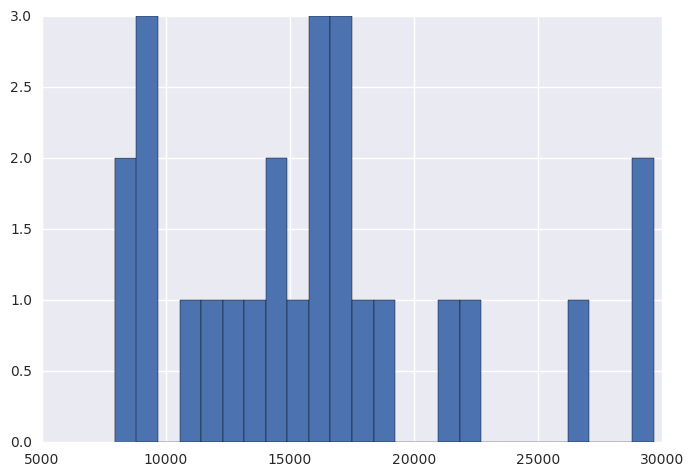

In [354]:
prices_df.AvgPrice.hist(bins=25);

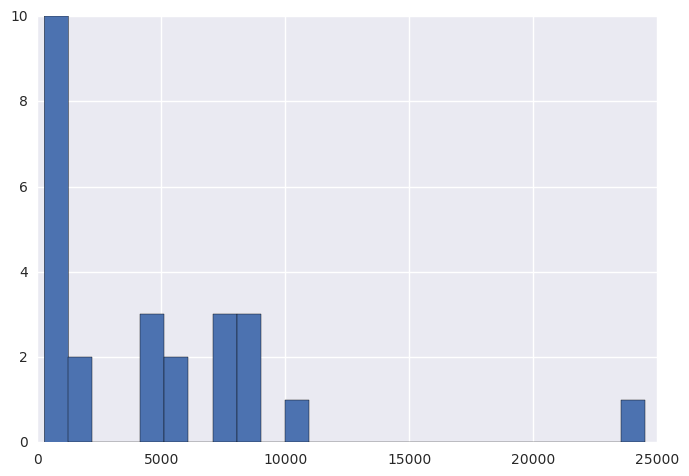

In [356]:
prices_df.MedianPrice.hist(bins=25);

#### There is a lot of variance, as well as outliers, in the data.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Does it makes sense to buy RVs in one region and sell them in another?

Assuming the cost of shipping or driving from one regional market to another.

#### Based on this data, yes, it does make sense, given that there are some large differences in prices that may compensate for shipping/driving costs, but this could just be dependent on differences in actual RVs being sold in different regions, not on differences in prices for the same RV.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.2 Can you pull out the "make" from the markup and include that in your analyis?
How reliable is this data and does it make sense?

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.3 Are there any other variables you could pull out of the markup to help describe your dataset?

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Move your project into scrapy (if you haven't used Scrapy yet)

>Start a project by using the command `scrapy startproject [projectname]`
> - Update your settings.py (review our past example)
> - Update your items.py
> - Create a spiders file in your `[project_name]/[project_name]/spiders` directory

You can update your spider class with the complete list of craigslist "start urls" to effectively scrape all of the regions.  Start with one to test.

Updating your parse method with the method you chose should require minimal changes.  It will require you to update your parse method to use the response parameter, and an item model (defined in items.py).

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7.  Chose another area of Craigslist to scrape.

**Choose an area having more than a single page of results, then scrape multiple regions, multiple pages of search results and or details pages.**

This is the true exercise of being able to understand how to succesffuly plan, develop, and employ a broader scraping strategy.  Even though this seems like a challenging task, a few tweeks of your current code can make this very managable if you've pieced together all the touch points.  If you are still confused as to some of the milestones within this process, this is an excellent opportunity to round out your understanding, or help you build a list of questions to fill in your gaps.

_Use Scrapy!  Provide your code in this project directory when you submit this project._

## Optional: Interview Questions

---- 

### SQL Practice

1)
We have a deliveries table with 3000 rows

`SELECT * FROM deliveries; 
-- 3000 rows in set (0.05 sec) `

15 of those orders are from a customer with the customer_id_number=32

`SELECT * FROM deliveries WHERE customer_id_number = 32;
-- 15 rows in set (0.10 sec)`

Yet, when we SELECT the number of orders that are not from customer_id_number = 32, we only get 2960 results:

`SELECT * FROM deliveries WHERE customer_id_number <> 32;
-- 2960 rows in set (0.11 sec)`

**Question: What’s wrong? And why might this be the case? Modify your code to fix this. **

2) Construct the following tables:

`mysql> SELECT * FROM Employee;
+--------+----------+--------+
| emp_id | emp_name | salary |
+--------+----------+--------+
| 1      | James    |   2000 |
| 2      | Jack     |   4000 |
| 3      | Henry    |   6000 |
| 4      | Tom      |   8000 |
+--------+----------+--------+
4 rows IN SET (0.00 sec)`


`mysql> SELECT * FROM Department;
+---------+-----------+
| dept_id | dept_name |
+---------+-----------+
| 101     | Sales     |
| 102     | Marketing |
| 103     | Finance   |
| 104     | Accounting   |
+---------+-----------+
3 rows IN SET (0.00 sec)`


`mysql> SELECT * FROM Register;
+--------+---------+
| emp_id | dept_id |
+--------+---------+
|      1 |     101 |
|      2 |     102 |
|      3 |     103 |
|      4 |     102 |
+--------+---------+
4 rows IN SET (0.00 sec)`

** Questions: ** 
- Which employees belong to which department? Show this using one line of code (hint: more than one join) 
- What is the total marketing salary? 
- Using a join, can you show that there are no employees in accounting? 



3) Given an Employee table which has 3 fields – Id (Primary key), Salary and Manager Id, where manager id is the id of the employee that manages the current employee, find all employees that make more than their manager in terms of salary. Create the table and write the code that finds this


--- 
### Predictive Modeling

- What are some differences you would expect in a regression model that minimizes squared error, versus a model that minimizes absolute error? In which cases would each error  metric be appropriate?

- What error metric would you use to evaluate how good a binary classifier is? What if the classes are imbalanced?  What if there are more than 2 groups?

- What are various ways to predict a binary response variable? Can you compare two of them and tell me when one would be more appropriate? What’s the difference logistic regression and SVMs? 

- What is the difference between the loss functions used by SVMs and Logistic Regression? 

- What is R-squared? What are some other metrics that could be better than R-squared and why?

- You run your regression on different subsets of your data, and find that in each subset, the beta value for a certain variable varies wildly. What could be the issue here?


--- 
### Coding Questions 

- Given a sorted array and a number x, find a pair in array whose sum is closest to x. What is the time complexity of your algorithm? 
    
    `Examples:`
        Input: arr[] = {10, 22, 28, 29, 30, 40}, x = 54
        Output: 22 and 30

        Input: arr[] = {1, 3, 4, 7, 10}, x = 15
        Output: 4 and 10
        
- Check out this video on Linear Time Algorithm for finding the median: https://www.youtube.com/watch?v=_xntajCBLoE. Implement your version of this algorithm in Python. 

- Search in an almost sorted array: Given an array which is sorted, but after sorting some elements are moved to either of the adjacent positions, i.e., arr[i] may be present at arr[i+1] or arr[i-1]. Write an efficient function to search an element in this array. Basically the element arr[i] can only be swapped with either arr[i+1] or arr[i-1]. For example consider the array {2, 3, 10, 4, 40}, 4 is moved to next position and 10 is moved to previous position. [Hint: You can do this O(log n) time complexity]

    `Examples: `
        Input: arr[] =  {10, 3, 40, 20, 50, 80, 70}, key = 40
        Output: 2 
        Output is index of 40 in given array

        Input: arr[] =  {10, 3, 40, 20, 50, 80, 70}, key = 90
        Output: -1
        -1 is returned to indicate element is not present